# context classification

Sentence Transformers are a type of pre-trained models designed specifically for sentence embeddings.

By calculating the similarity, we can understand how similar are two sentences are in term of sementic meanings.

There are a few different way of calculate cos similarity

  - similarity calculation: cosine similarity, mean reciprocal rank, spearman correlation, peaerson correlation


  We will be using cos similarity because cos similarity measure of the cosine of the angle between two vectors in a multi-dimensional space. The cosine of the angle is a good indicator of the similarity between the vectors. If the vectors are pointing in the same direction, the cosine similarity is 1 (maximum similarity). If they are orthogonal, the cosine similarity is 0, indicating no similarity.


  - resource: https://huggingface.co/tasks/sentence-similarity
  - langchain: https://python.langchain.com/docs/integrations/text_embedding/sentence_transformers
  - model: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
  - for spanish model: https://huggingface.co/hiiamsid/sentence_similarity_spanish_es

In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=9eba48421718487789272bf7832b0d56d54ef3735d0426549e3fe20f2e7e981b
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util

## multi-qa-MiniLM-L6-cos-v1

- light weight architecture
- support multiple languages
- has been trained on 215M (question, answer) pairs from diverse sources.

In [37]:

sentences = ["How are you", "I am nott doing well", "I like to have a bread", "Do you want a cup of coffee?"]

model = SentenceTransformer('sentence-transformers/multi-qa-MiniLM-L6-cos-v1')
embeddings = model.encode(sentences)
print(embeddings)



[[ 0.08481656  0.07273853  0.02015951 ...  0.13010938 -0.01121889
  -0.0633851 ]
 [ 0.07233839 -0.02921016  0.00879774 ... -0.0742448   0.00465923
  -0.04376823]
 [-0.0016594  -0.03901114 -0.06350265 ... -0.03341132 -0.04219693
  -0.07601743]
 [ 0.0441352   0.0317576   0.0291786  ...  0.04548     0.00386118
  -0.06301805]]


In [38]:
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
embeddings_3 = embeddings[2]
embeddings_4 = embeddings[3]

print(util.pytorch_cos_sim(embeddings_1, embeddings_2))
print(util.pytorch_cos_sim(embeddings_1, embeddings_3))
print(util.pytorch_cos_sim(embeddings_3, embeddings_4))
print(util.pytorch_cos_sim(embeddings_3, embeddings_2))


tensor([[0.4167]])
tensor([[0.2704]])
tensor([[0.3693]])
tensor([[0.2554]])


In [39]:
model1 = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
embeddings = model1.encode(sentences)
print(embeddings)


[[-0.05938508  0.00024621  0.05006227 ...  0.06060192 -0.06505497
  -0.0701791 ]
 [-0.02776687 -0.05499756  0.10105915 ... -0.02671666 -0.02099161
  -0.02030624]
 [-0.02728429  0.0841023  -0.03818338 ... -0.03411802 -0.04845837
  -0.08128545]
 [-0.07110065 -0.02034364  0.0407109  ...  0.05523084  0.00626724
  -0.07217178]]


In [40]:
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
embeddings_3 = embeddings[2]
embeddings_4 = embeddings[3]

print(util.pytorch_cos_sim(embeddings_1, embeddings_2))
print(util.pytorch_cos_sim(embeddings_1, embeddings_3))
print(util.pytorch_cos_sim(embeddings_3, embeddings_4))
print(util.pytorch_cos_sim(embeddings_3, embeddings_2))


tensor([[0.5146]])
tensor([[0.2037]])
tensor([[0.3274]])
tensor([[0.1067]])


### try different similarity calculation

- pre-set expected response/ dialog
- drawback: the bot will always ask question

can we use gpt for classification? Yes, we can do that. However, it is expensive and also the response may be consistent.

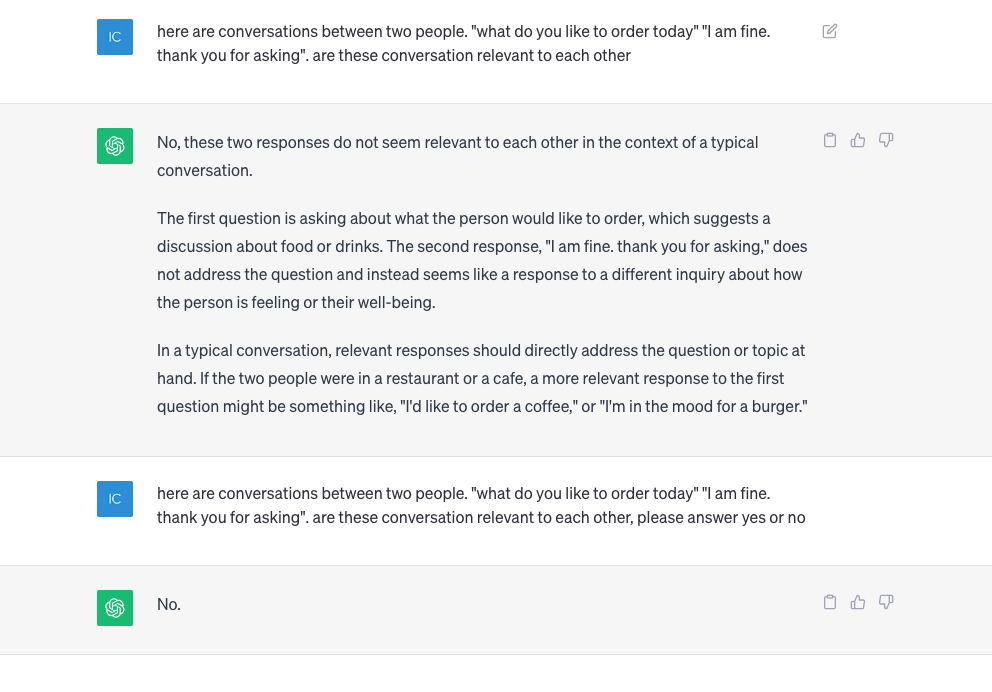

## how does it performance with error in the sentence/ with name and place

In [46]:
sentences = [ "Do you want a cup of coffee?", "I wat cofee"]
embeddings = model.encode(sentences)

In [47]:
embeddings = model.encode(sentences)
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))

tensor([[0.1870]])


In [48]:
embeddings = model1.encode(sentences)
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))

tensor([[0.2814]])


In [58]:
sentences = [ "What is your name?", "I am Molly"]

In [59]:
embeddings = model.encode(sentences)
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))

tensor([[0.4315]])


In [60]:
embeddings = model1.encode(sentences)
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))

tensor([[0.4055]])


In [61]:
sentences = [ "Where are you from", "I am from California"]

In [62]:
embeddings = model.encode(sentences)
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))

tensor([[0.6670]])


In [63]:
embeddings = model1.encode(sentences)
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))

tensor([[0.5925]])


In [64]:
sentences = [ "Hola, ¿cómo estás?", "A las diez"]

In [65]:
embeddings = model.encode(sentences)
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(1- distance.cosine(embeddings_1, embeddings_2))

0.2278560847043991


In [66]:
embeddings = model1.encode(sentences)
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))

tensor([[0.4036]])


From the observation above, we can see that it is doing `qa` model in general is doing better than `all` model for question and answer mode. Both models perform poorly if there is a lot typo.

In [ ]:
len(embeddings_1)

384

In [ ]:
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))
# print(util.pytorch_cos_sim(embeddings_1, embeddings_3))
# print(util.pytorch_cos_sim(embeddings_2, embeddings_3))
# print(util.pytorch_cos_sim(embeddings_2, embeddings_4))

tensor([[0.7777]])


Use scipy to calculate the similarity install of pytorch
- aws lamdba has built in package for scipy
- importing pytorch package will explode the memory

In [ ]:
from scipy.spatial import distance
1- distance.cosine(embeddings_1, embeddings_2)


0.7777004837989807

# classification evaluation

In [5]:
#read in dataset
import pandas as pd
df = pd.read_csv('content_classification_data.csv')

In [ ]:
df[:5]

,question,user,english_translation,"label (1: on topic, 0: off topic)"
0,"Hola, ¿cómo estás?","Muy bien, gracias.",I am doing very well.,1
1,"Hola, ¿cómo estás?",Estoy triste.,I am sad.,1
2,"Hola, ¿cómo estás?",Estoy muy triste para ser honesta,I am very sad if I am being honest.,1
3,"Hola, ¿cómo estás?",Estoy tan feliz,I am very happy.,1
4,"Hola, ¿cómo estás?",Estoy aburrida,I am bored.,1


In [6]:
df.rename(columns={"label (1: on topic, 0: off topic) ": 'label'}, inplace=True)

In [22]:
# number of input
df.shape

(240, 7)

In [24]:
# label distribution
grouped_counts = df.groupby('label').size()
grouped_counts

label
0    120
1    120
dtype: int64

since this is a man made dataset, we have even distribution of positive and negative sample

In [7]:
model = SentenceTransformer('sentence-transformers/multi-qa-MiniLM-L6-cos-v1')

def get_embedding(sentences):
  embeddings = model.encode(sentences)
  return embeddings

In [8]:
df['question_embedding'] =df['question'].apply(get_embedding)
df['user_answer_embedding'] =df['user'].apply(get_embedding)

Calculating cos similarity

Note: cos similarity is equal to 1- cos distnace

In [9]:
from scipy.spatial import distance

def predict(user_answer_embedding, question_embedding):
    similarity_score = 1- distance.cosine(user_answer_embedding, question_embedding)
    # set the cutoff threshold
    return similarity_score


In [10]:
df['similarity_score'] = df.apply(lambda row : predict(row['question_embedding'], row['user_answer_embedding']), axis=1)

In [12]:
y_test_pred_raw = df['similarity_score'].to_list()

In [13]:
y_test = df['label'].to_list()

In [14]:
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

## calculating F1, accuracy, precision, recall

In [15]:
def evaluation(y_test_pred_raw, y_test, threshold):
  y_test_pred = [1 if i > threshold else 0 for i in y_test_pred_raw ]
  f1_score_result = round(f1_score(y_test, y_test_pred), 3)
  precision_score_result = round(precision_score(y_test, y_test_pred), 3)
  accuracy_score_result = round(accuracy_score(y_test, y_test_pred),3)
  recall_score_result =round(recall_score(y_test, y_test_pred),3)
  return [threshold,f1_score_result, accuracy_score_result, precision_score_result,recall_score_result ]

In [16]:
final_result = []
for i in range (0, 100,2):
  threshold = i/100
  final_result.append(evaluation(y_test_pred_raw, y_test, threshold))

df1 = pd.DataFrame(final_result, columns= ['threshold','f1_score','accuracy', 'precision', 'recall'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [17]:
df1

,threshold,f1_score,accuracy,precision,recall
0,0.00,0.667,0.500,0.500,1.000
1,0.02,0.665,0.500,0.500,0.992
2,0.04,0.667,0.504,0.502,0.992
3,0.06,0.667,0.504,0.502,0.992
4,0.08,0.667,0.504,0.502,0.992
5,0.10,0.665,0.504,0.502,0.983
6,0.12,0.667,0.508,0.504,0.983
7,0.14,0.669,0.512,0.506,0.983
8,0.16,0.663,0.508,0.504,0.967
9,0.18,0.655,0.500,0.500,0.950


Note: The F1 score, recall and precision are 0 starting from 0.86 is because there is no data in the dataset that have similarity score higher than 0.86. In addition, we believe that since it is a question and answer, it is rare to have a sementic meaning that have similarity equals to 1.

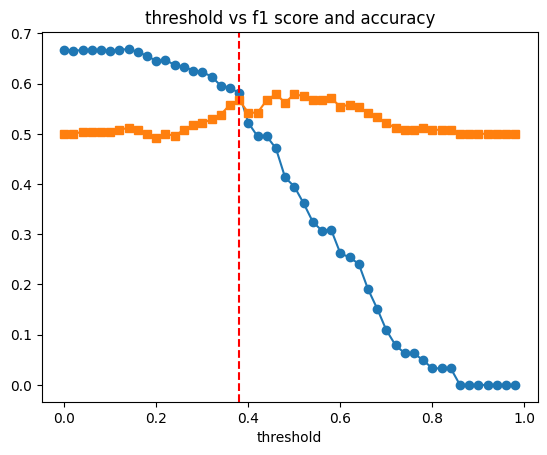

In [19]:
import matplotlib.pyplot as plt
plt.plot(df1['threshold'], df1['f1_score'],label='f1', marker='o')
plt.plot(df1['threshold'], df1['accuracy'], label='accuracy', marker='s')

# Adding labels and title
plt.xlabel('threshold')
# plt.ylabel('f1 score')
plt.title('threshold vs f1 score and accuracy')
plt.axvline(x=0.38, color='red', linestyle='--', label='Vertical Line at x=3')


We decides 0.38 as our the threshold of on topic and off topic. Decision threshold at 0.38 has the highest F1 and accuracy.

We obverse few interesting pattern

### Example of similarity below

In [11]:
df[df['similarity_score']<= 0.20]

,question,user,english_translation,label,question_embedding,user_answer_embedding,similarity_score
11,¿Estás libre hoy?,si,yes,1,"[-0.004062928, 0.028612368, -0.04394535, 0.007...","[0.019651512, -0.011536583, -0.046099756, -0.0...",0.088959
13,¿Estás libre hoy?,no,no,1,"[-0.004062928, 0.028612368, -0.04394535, 0.007...","[0.009998815, -0.02589966, -0.03832039, 0.0194...",0.187406
20,¿Quieres ir de compras conmigo?,si,yes,1,"[-0.06960615, 0.0025927522, -0.040796272, 0.01...","[0.019651512, -0.011536583, -0.046099756, -0.0...",0.183946
21,¿Quieres ir de compras conmigo?,no,no,1,"[-0.06960615, 0.0025927522, -0.040796272, 0.01...","[0.009998815, -0.02589966, -0.03832039, 0.0194...",0.157751
33,¿A qué hora te gustaría ir?,a las 11,at 11,1,"[0.034719065, 0.063108675, -0.011103606, 0.040...","[0.0376552, -0.005023309, -0.06986956, 0.06305...",0.016733
35,¿A qué hora te gustaría ir?,hagamos pastel de cerezas,let's make cherry pie,0,"[0.034719065, 0.063108675, -0.011103606, 0.040...","[-0.14859682, 0.04191783, -0.09057941, 0.01070...",0.180201
41,"Vale, nos vemos luego.",gracias me divertí,thanks i had fun,1,"[-0.01571188, 0.01233332, -0.031463694, -0.027...","[-0.052185636, 0.02735437, 0.047845524, 0.0375...",0.188876
44,"Vale, nos vemos luego.",OK,ok,1,"[-0.01571188, 0.01233332, -0.031463694, -0.027...","[0.008350518, 0.04188512, 0.05005515, 0.031083...",0.158545
55,"Hola, ¿cómo estás?",No.,No.,0,"[0.0024989129, 0.053960882, -0.047835328, -0.0...","[0.022201419, -0.009223751, -0.018509045, 0.01...",0.136586
88,¿A qué hora te gustaría ir?,Tomo un taxi.,NaN,0,"[0.034719065, 0.063108675, -0.011103606, 0.040...","[-0.03858819, 0.040440794, -0.028914142, -0.01...",0.102765


In [68]:
df[df['similarity_score']>= 0.75]

,question,user,english_translation,label,question_embedding,user_answer_embedding,similarity_score
10,¿Estás libre hoy?,si estoy libre hoy,yes i am free,1,"[-0.004062928, 0.028612368, -0.04394535, 0.007...","[-0.0018014704, 0.027054908, -0.04326477, -0.0...",0.853456
93,"Vale, nos vemos luego.",Nos vemos luego.,NaN,1,"[-0.01571188, 0.01233332, -0.031463694, -0.027...","[-0.041145407, 0.0059816996, -0.008945807, -0....",0.846961
101,"Hola, ¿cómo estás?",¡Hola!,Hello,0,"[0.0024989129, 0.053960882, -0.047835328, -0.0...","[-0.012364091, 0.06614288, -0.06735695, 0.0022...",0.776097
141,"Vale, nos vemos luego.",¡Vale! Hasta luego.,Okay! See you later.,1,"[-0.01571188, 0.01233332, -0.031463694, -0.027...","[0.030461285, 0.023728497, -0.062461406, 0.006...",0.761956
156,"Hola, ¿cómo estás?",Hola que hora es ahora,"Hello, what time is it right now",0,"[0.0024989129, 0.053960882, -0.047835328, -0.0...","[0.022132782, 0.13258351, -0.008987562, -0.004...",0.766385
215,¿Quieres ir de compras conmigo?,Me encantaría ir de compras contigo.,I would love to go shopping with you.,1,"[-0.06960615, 0.0025927522, -0.040796272, 0.01...","[-0.027259294, 0.031833556, -0.06018647, 0.035...",0.790309


In the samples above are , we saw that there are two false positive results (101, and 156). Both of the answers include hello, but did not address the questions. These are some example of edge cases that will not able to handle by the classification and the user will proceed the conversation in our web app.

# Work with Vector Database

we can use vector database to store the vector in advance and avoid repeat calculation for the same sentences (example: the encoding of our question). The code below shows how we can use chromadb to store the question embedding and retrieve the closest distance vector based on the input (user input).

reference: https://docs.trychroma.com/api-reference

In [ ]:
!pip install -q chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.8/479.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57

In [ ]:
import pandas as pd
import chromadb
from chromadb.api.types import Documents, Embeddings
from chromadb.utils import embedding_functions


In [ ]:
#data input
answer1 = 'My name Jess'
answer2 = 'I am fine. Thank you. And you? '
answer3 = 'I from Pennsylvania. '
doc = [answer1, answer2, answer3]

In [ ]:
# # using hugging face
# huggingface_ef = embedding_functions.HuggingFaceEmbeddingFunction(
#     api_key="YOUR_API_KEY",
#     model_name="sentence-transformers/all-MiniLM-L6-v2"
# )

In [ ]:
# default model
## english
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="all-MiniLM-L6-v2")

## spanish
# sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="distiluse-base-multilingual-cased-v1")


In [ ]:
# chroma_client = chromadb.Client()
#   ## In-memory chroma with saving/loading to disk
#   # chroma_client = chromadb.PersistentClient(path="/path/to/data")
# db = chroma_client.create_collection(name='test2', embedding_function=sentence_transformer_ef)
# db.add(
#     documents=[answer1,answer2, answer3],
#     metadatas=[{"answer": answer1}, {"answer": answer2} , {"answer":answer3}],
#     ids=["id1", "id2", 'id3']
# )

# results = db.query(
#     query_texts=["I am fine"],
#     n_results=2
# )

# results

In [ ]:
def create_chroma_db(documents, name):
  # get the client
  chroma_client = chromadb.Client()
  ## In-memory chroma with saving/loading to disk
  # chroma_client = chromadb.PersistentClient(path="/path/to/data")
  db = chroma_client.create_collection(name=name, embedding_function=sentence_transformer_ef)
  for i,d in enumerate(documents):
    db.add(
      documents=d,
      metadatas = {'aq_pair': d},
      ids=str(i)
    )
  return db

In [ ]:
db = create_chroma_db([answer1, answer2, answer2], "lang-bot")

In [ ]:
results = db.query(
    query_texts=["I am fine"],
    n_results=1
)

results

{'ids': [['2']],
 'distances': [[0.4477984309196472]],
 'metadatas': [[{'aq_pair': 'I am fine. Thank you. And you? '}]],
 'embeddings': None,
 'documents': [['I am fine. Thank you. And you? ']]}

In [ ]:
results['distances'][0]

[0.4477984309196472]

In [ ]:
# db = create_chroma_db([answer1, answer2, answer2], "lang-bot")

In [ ]:
# pd.DataFrame(db.peek(1))

In [ ]:
# def get_relevant_passage(query, db):
#   passage = db.query(query_texts=[query], n_results=1)['documents'][0][0]
#   return passage

In [ ]:
# # Perform embedding search
# passage = get_relevant_passage("Hi, my name is Isabel", db)
# # passage

In [ ]:
# passage = get_relevant_passage("The weather is super bad", db)
# passage

In [ ]:
# # can only get the document by idea
# db.get(ids=['1'], include=['embeddings', 'documents', 'metadatas'])

In [ ]:
# need to get the score

# option 1 new db (https://www.datacamp.com/blog/the-top-5-vector-databases)
# use langchain